In [28]:
import pandas as pd 
import numpy as np

import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import matplotlib.pyplot as plt

from prophet import Prophet

import datetime
from datetime import datetime

In [2]:
data_consumo = pd.read_csv('DatosConsumoCombustibles.csv')
data_importaciones = pd.read_csv('DatosImportacionCombustibles.csv')

In [3]:
data_consumo = data_consumo.fillna(1)

In [21]:
data_consumo.count()

Unnamed: 0            257
Anio                  257
Mes                   257
GasolinaSuper         257
GasolinaRegular       257
TotalGasolinas        257
Diesel                257
DieselLS              257
DieselULS             257
TotalDiesel           257
GLP                   257
GasolinaAviacion      257
Kerosina              257
TurboJet              257
Bunker                257
Asfalto               257
PetCoke               257
AceitesLubricantes    257
GrasasLubricantes     257
Solventes             257
Naftas                257
Ceras                 257
CrudoNacional         257
Butano                257
Orimulsion            257
MezclasOleosas        257
Total                 257
Date                  257
ds                    257
y                     257
dtype: int64

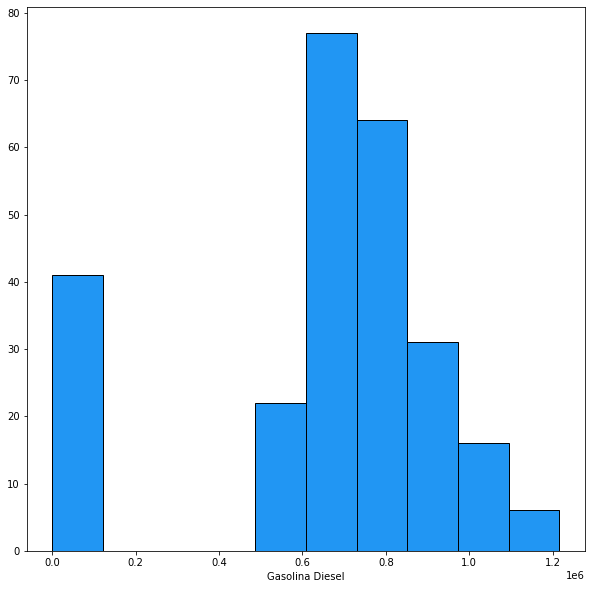

In [24]:
plt.hist(data_consumo['Diesel'], color='#2196f3',ec='black')
plt.xlabel('Gasolina Diesel')
plt.show()

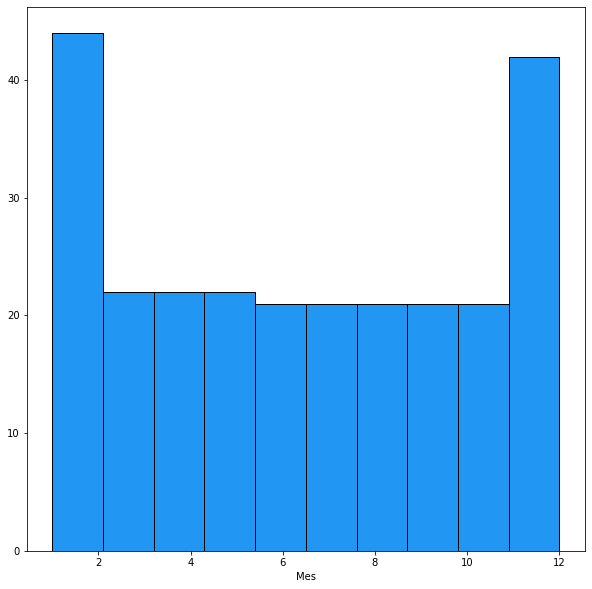

In [26]:
plt.hist(data_consumo['Mes'], color='#2196f3',ec='black')
plt.xlabel('Mes')
plt.show()

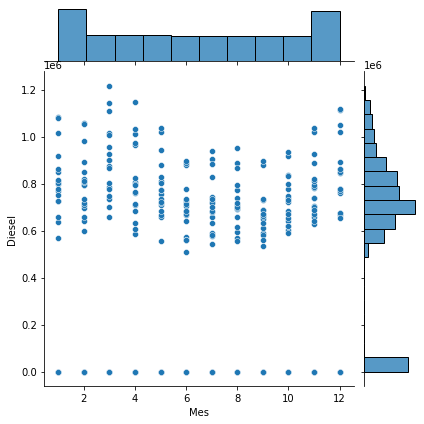

In [30]:
_ = sns.jointplot(x='Mes', y='Diesel', data=data_consumo)

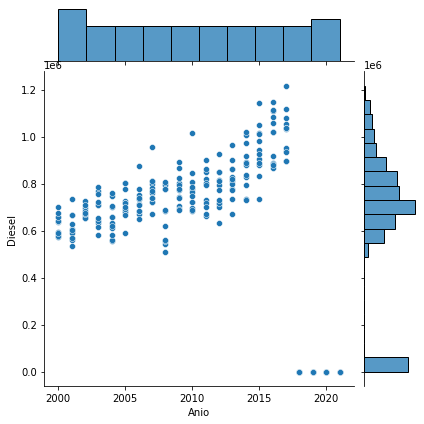

In [31]:
_ = sns.jointplot(y='Diesel', x='Anio', data=data_consumo)

In [5]:
anio = data_consumo.Anio*10000
mes = data_consumo.Mes*100+1
data_consumo['Date'] = pd.to_datetime((data_consumo.Anio*10000+data_consumo.Mes*100+1).apply(str),format='%Y%m%d')

anio = data_importaciones.Anio*10000
mes = data_importaciones.Mes*100+1
data_importaciones['Date'] = pd.to_datetime((data_importaciones.Anio*10000+data_importaciones.Mes*100+1).apply(str),format='%Y%m%d')

In [6]:
data_consumo.index = data_consumo.Date
data_importaciones.index = data_importaciones.Date

# Serie univariante

### Diesel consumo

In [7]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=1000):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_consumo, x=data_consumo.Date, y=data_consumo.Diesel, title='Gasolina Diesel')

Inicio: 2000 ; Fin: 2021, en realiadad 2018 ; Frecuencia cada 12 meses / 1 año

# Descomposición de la serie en componentes

### Diesel dataset consumo

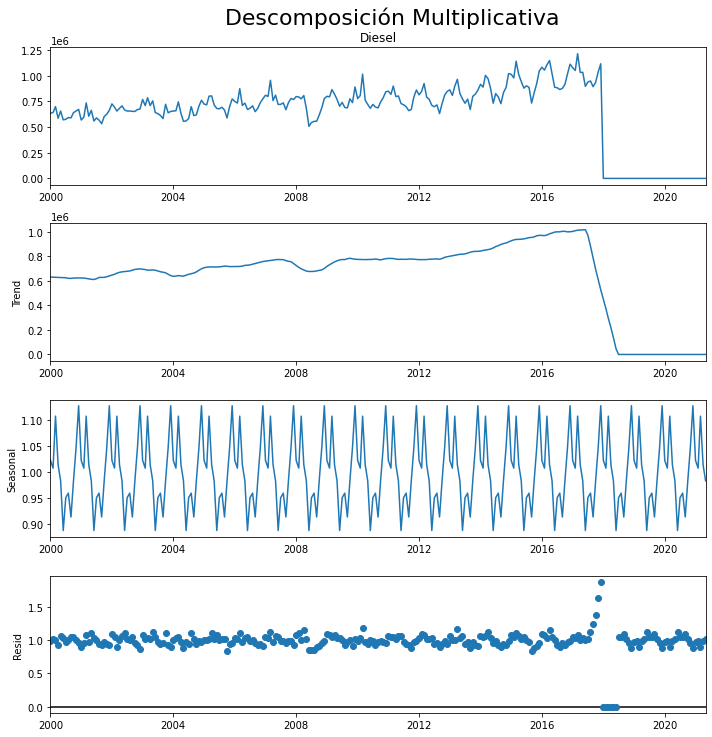

In [8]:
result_mul = seasonal_decompose(data_consumo.Diesel, model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_mul.plot().suptitle('Descomposición Multiplicativa', fontsize=22, x=0.55, y=1.02)

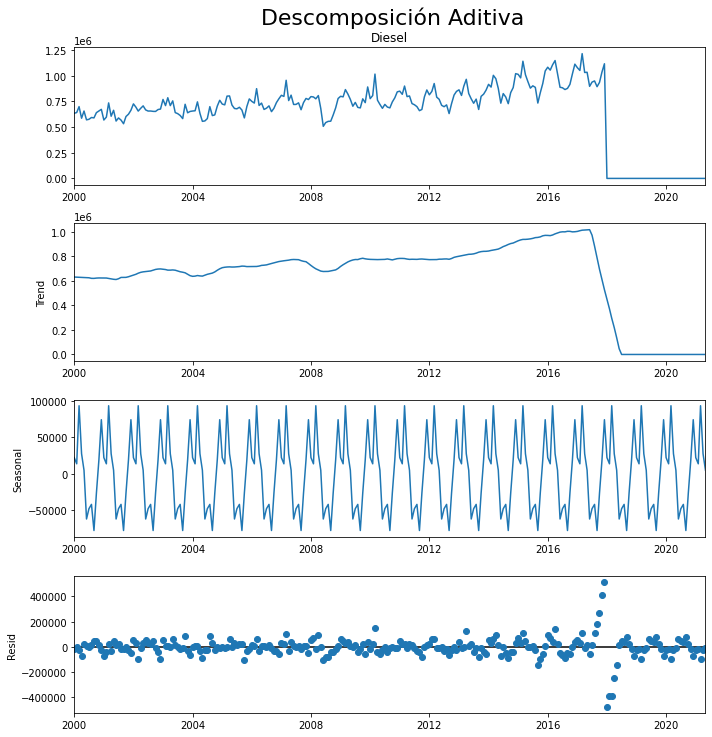

In [9]:
result_add = seasonal_decompose(data_consumo['Diesel'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
_ = result_add.plot().suptitle('Descomposición Aditiva', fontsize=22, x=0.55, y=1.02)

# Graficos Autocorrelación

### Diesel consumo

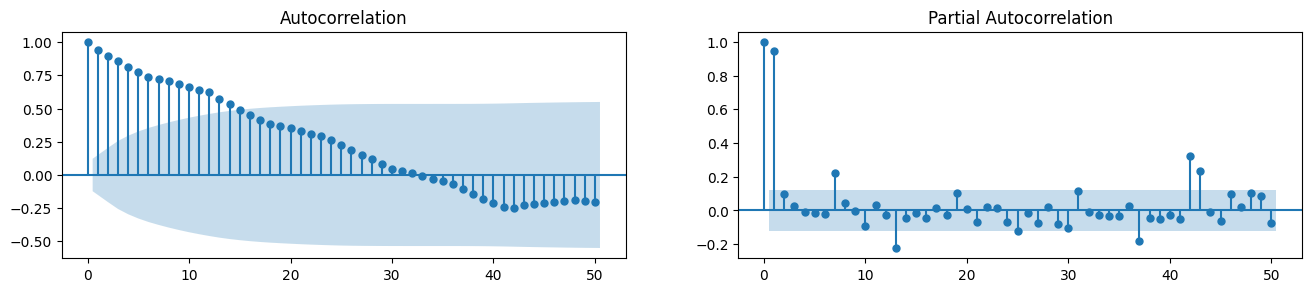

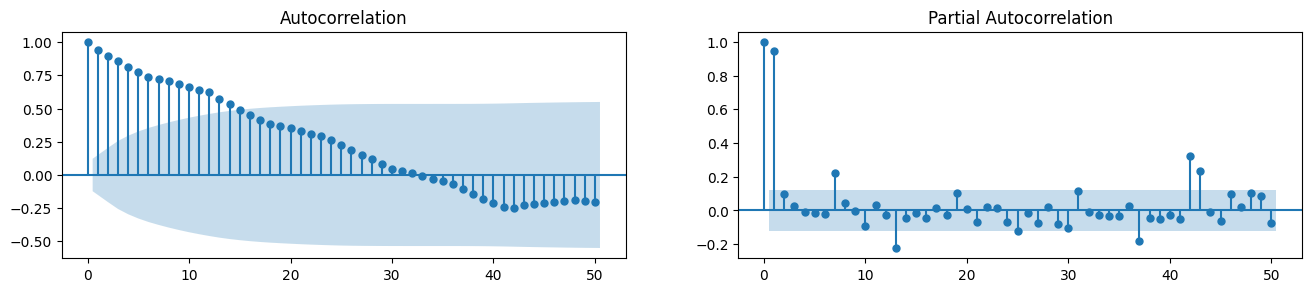

In [10]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_consumo.Diesel.tolist(), lags=50, ax=axes[0])
plot_pacf(data_consumo.Diesel.tolist(), lags=50, ax=axes[1])

# Prueba de Dickey-Fuller

### Diesel consumo

In [11]:
result = adfuller(data_consumo.Diesel, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.2995413947713246
p-value: 0.6293821000045001
Critial Values:
   1%, -3.457437824930831
Critial Values:
   5%, -2.873459364726563
Critial Values:
   10%, -2.573122099570008


# Modelo ARIMA

### Diesel consumo

                               SARIMAX Results                                
Dep. Variable:                 Diesel   No. Observations:                  257
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3302.834
Date:                Fri, 06 Aug 2021   AIC                           6613.669
Time:                        18:05:43   BIC                           6627.850
Sample:                    01-01-2000   HQIC                          6619.372
                         - 05-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7416      0.440      1.685      0.092      -0.121       1.604
ma.L1         -0.8752      0.455     -1.925      0.054      -1.766       0.016
ma.L2          0.0405      0.112      0.363      0.7

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


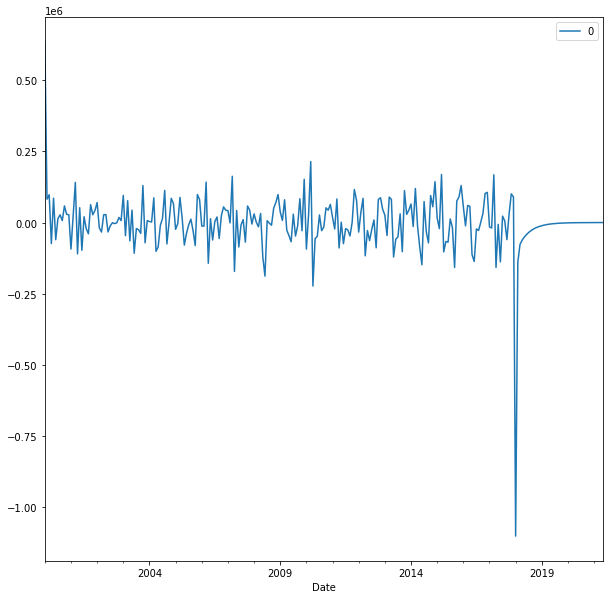

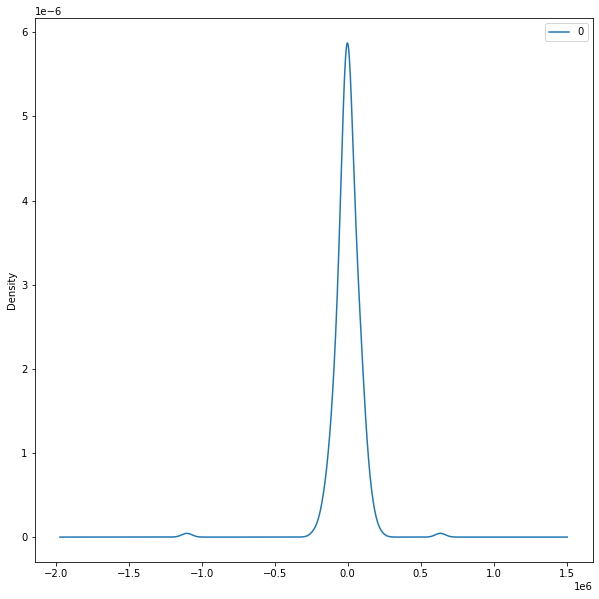

                  0
count  2.570000e+02
mean  -2.579389e+02
std    1.048060e+05
min   -1.101759e+06
25%   -3.312388e+04
50%   -5.206499e+02
75%    4.309212e+04
max    6.346671e+05


In [12]:
model = ARIMA(data_consumo['Diesel'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Prophet

### Diesel consumo

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4752
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       318.843    0.00459945       131.141   3.537e-05       0.001      144  LS failed, Hessian reset 
      99       319.187   0.000853233       59.8193           1           1      153   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       322.152    0.00512279       87.4501        0.11           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       323.447   5.72499e-05       89.9144   7.268e-07       0.001      377  LS failed, Hessian reset 
     299       323.452   2.03922e-07       94.7096       0.609       0.609      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       323.452   7.03414e-09       87.2994      0.2223      0.2223      468   
Optimization terminat

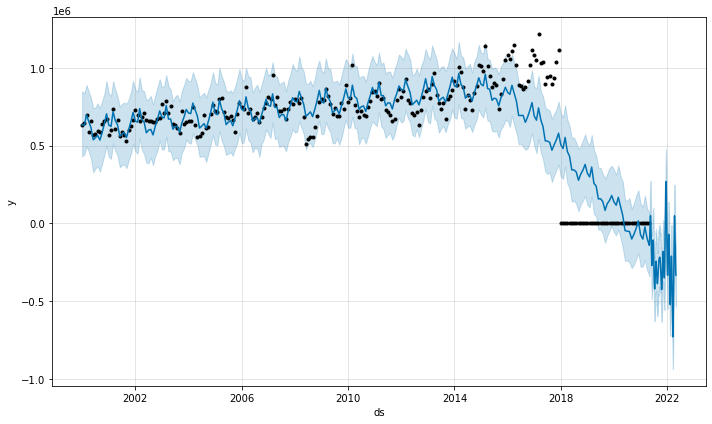

In [13]:
data_consumo["ds"] = data_consumo.Date
data_consumo["y"] = data_consumo.Diesel

data = data_consumo[["ds","y"]]

m = Prophet()
m.fit(data_consumo)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

# Predicciones

### Ultimos 3 años, Diesel consumo

In [15]:
sarima_model = SARIMAX(data_consumo.Diesel, order=(2,0,1), seasonal_order=(2, 1, 0, 24))
results = sarima_model.fit()
results.aic

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19766D+01    |proj g|=  4.43058D-01

At iterate    5    f=  1.17944D+01    |proj g|=  2.11508D-02

At iterate   10    f=  1.17936D+01    |proj g|=  7.97451D-04

At iterate   15    f=  1.17936D+01    |proj g|=  2.75496D-03

At iterate   20    f=  1.17934D+01    |proj g|=  7.66232D-04

At iterate   25    f=  1.17932D+01    |proj g|=  3.51083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     31      1     0     0   

6073.725466169817

In [16]:
pred = results.get_prediction(start=pd.to_datetime('01/01/2000'), dynamic=False)
pred_ci = pred.conf_int()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


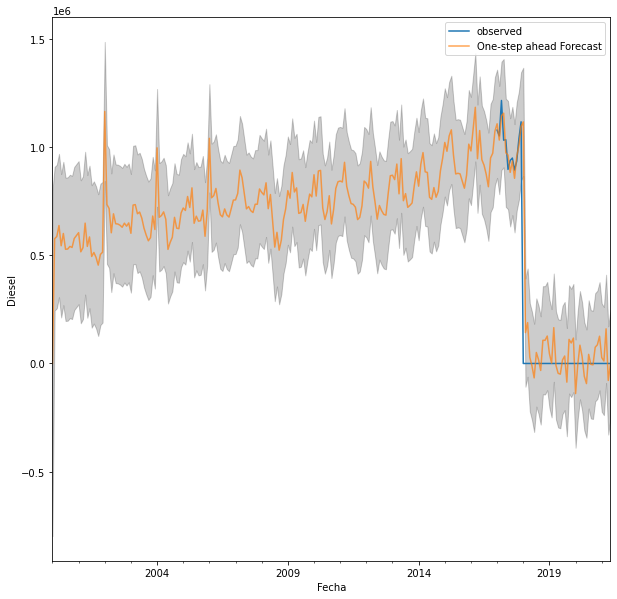

In [18]:
ax = data_consumo.Diesel['01/01/2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Diesel')
plt.legend()

plt.show()

### Año 2021, diesel consumo

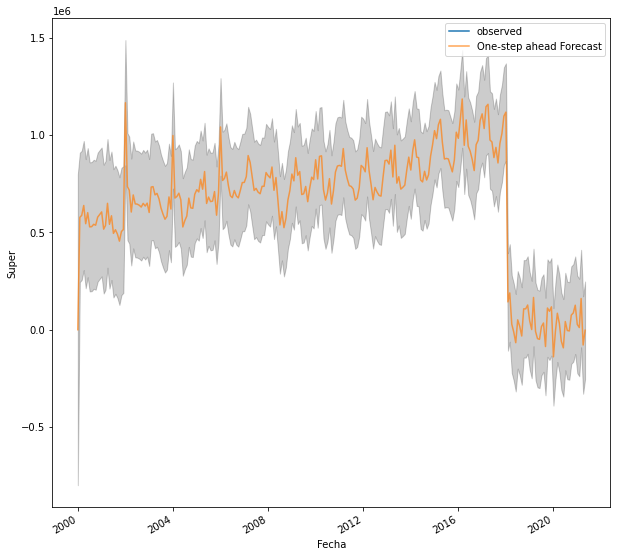

In [20]:
ax = data_consumo.Diesel['31/12/2021':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
 pred_ci.iloc[:, 0],
 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Super')
plt.legend()

plt.show()